## Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

### 1.1. Скачать данные


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости

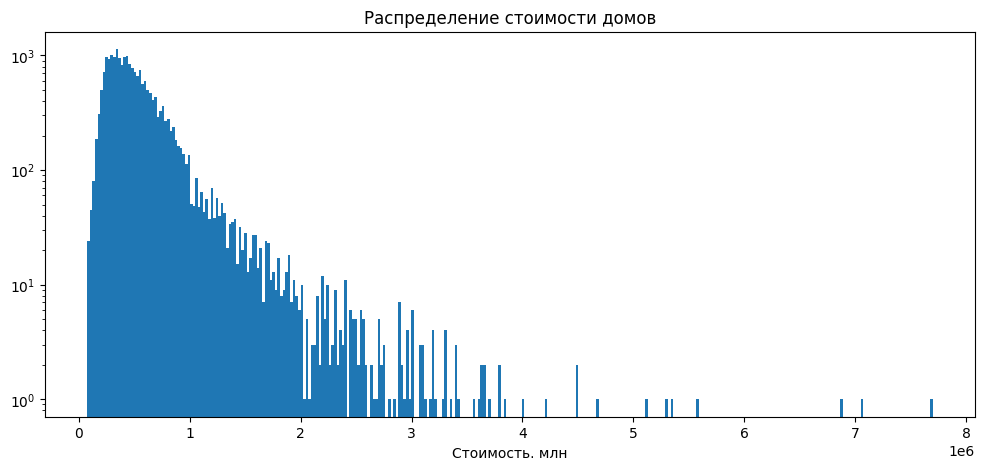

In [3]:
plt.figure(figsize=(12, 5))

plt.hist(df['price'], bins='auto', log=True)

plt.title('Распределение стоимости домов')
plt.xlabel('Стоимость. млн');



### 1.3. Изучите распределение квадратуры жилой площади


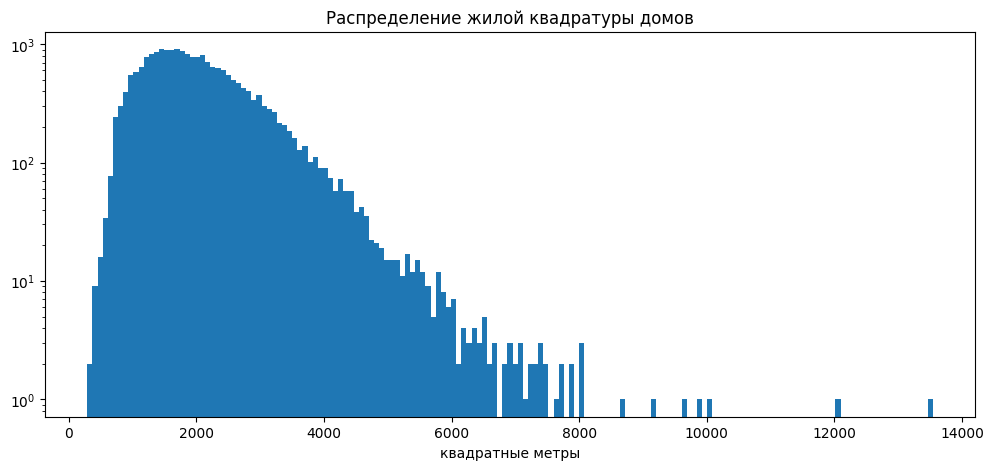

In [4]:
plt.figure(figsize=(12, 5))

plt.hist(df['sqft_living'], bins='auto', log=True)

plt.title('Распределение жилой квадратуры домов')
plt.xlabel('квадратные метры');

Колличество домов большой квадратуры около 3000

### 1.4. Изучите распределение года постройки

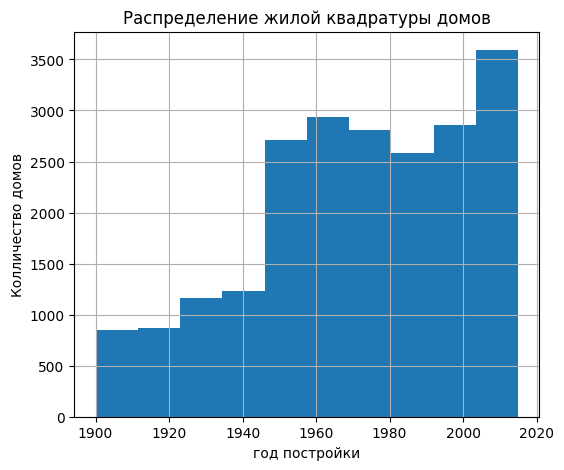

In [5]:
plt.figure(figsize=(6, 5))

plt.hist(df['yr_built'])

plt.title('Распределение жилой квадратуры домов')
plt.xlabel('год постройки')
plt.ylabel('Колличество домов')

plt.grid();

В большей массе дома строили чаще после 1950 года

## 2 задача
Постройте график
Сделайте выводы
### 2.1. Изучите распределение домов от наличия вида на набережную


In [6]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

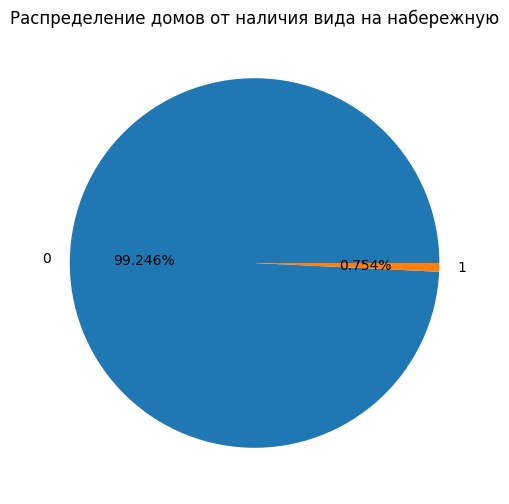

In [7]:
plt.figure(figsize=(12,6))

plt.pie(data, labels=data.index, autopct='%1.3f%%')
plt.title('Распределение домов от наличия вида на набережную');

Почти все дома не имеют вида на набережную.

### 2.2. Изучите распределение этажей домов


In [8]:
data2 = df['floors'].value_counts()
data2

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

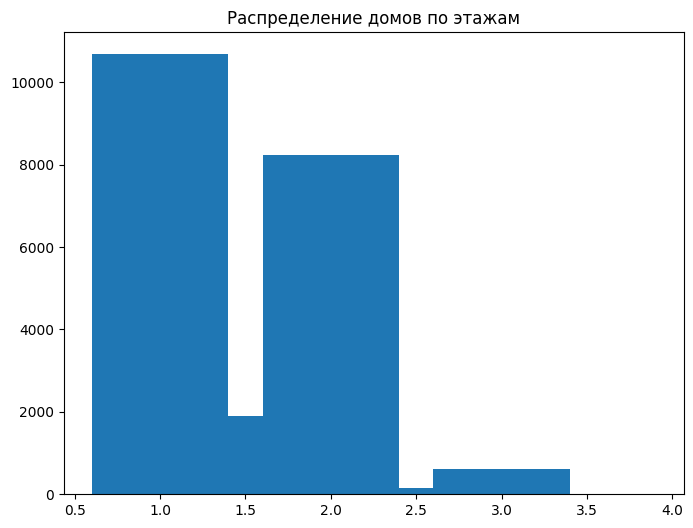

In [9]:
plt.figure(figsize=(8, 6))

plt.bar(data2.index, data2)

plt.title('Распределение домов по этажам');

Большинство домов одноэтажные и двухэтажные

### 2.3. Изучите распределение состояния домов

In [10]:
data3 = df['condition'].value_counts()
data3

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

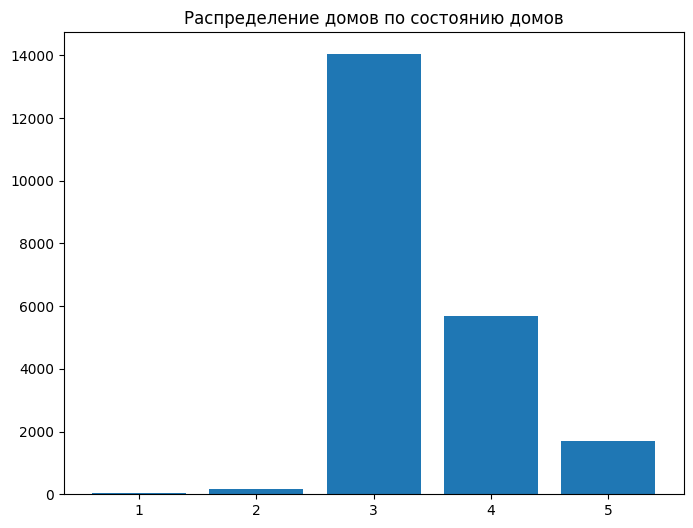

In [11]:
plt.figure(figsize=(8, 6))

plt.bar(data3.index, data3)

plt.title('Распределение домов по состоянию домов');

в основном дома имеют оценку 3 бала

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [13]:
corr_m = df.corr().round(1)
corr_m[np.abs(corr_m) < 0.3] = 0
corr_m

<ipython-input-13-353e2585ea03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = df.corr().round(1)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


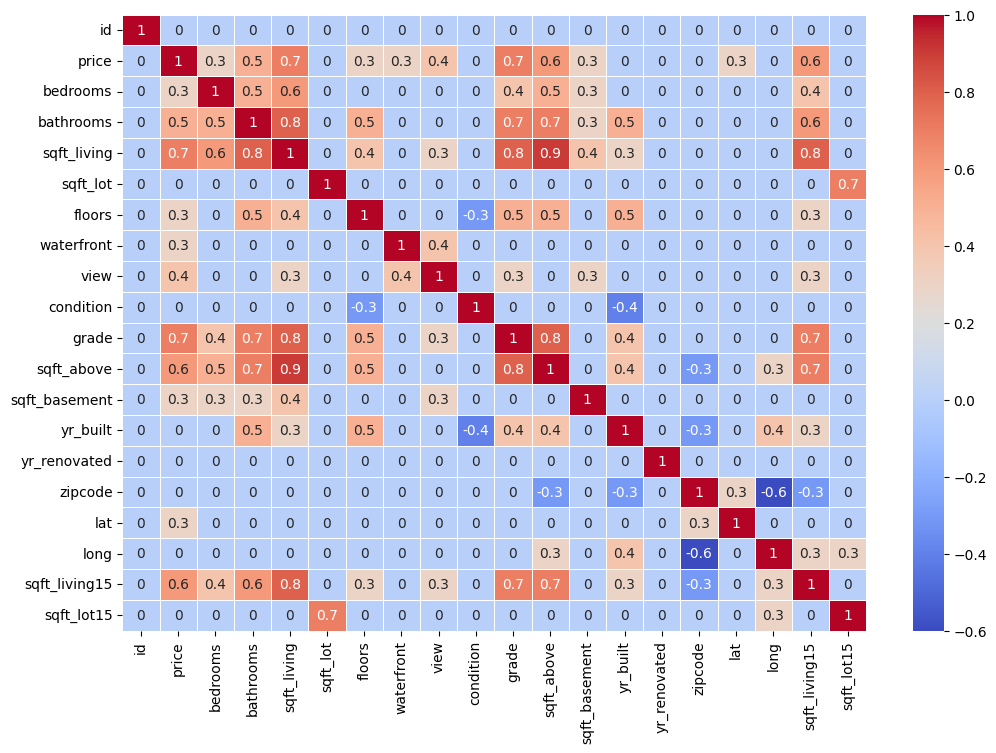

In [15]:
plt.figure(figsize=(12, 8))

sns.heatmap(corr_m, annot=True, linewidths=.5, cmap='coolwarm');

Кореляция с ценой:
1. Сильная зависимость цены от колличества жилой площади, колличества ванных комнат, качества архитектуры и отделки, количества кв. метров выше уровня земли и количества квадратных метров у 15 соседей.
2. Незначительная зависимость цены от количества спален, этажности здания, вида из окна, наличия подвала и широты расположения.

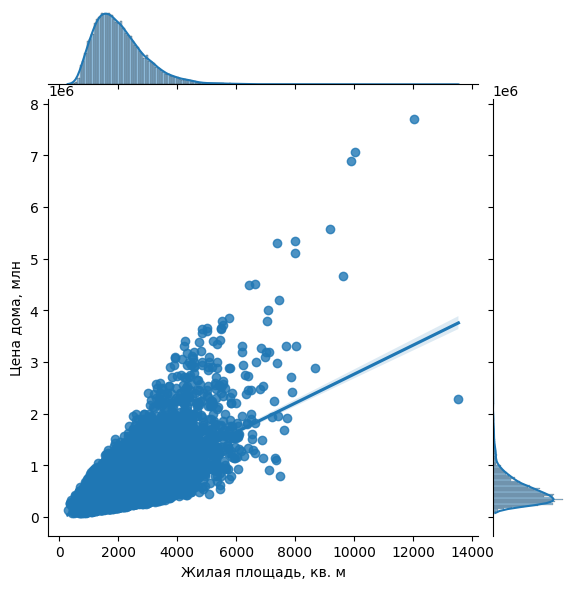

In [22]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')

plt.xlabel("Жилая площадь, кв. м")
plt.ylabel("Цена дома, млн");


Вывод: Имеется выраженная зависимость цены от жилой площади, зависимость более чёткая в нижнем ценовом диапазоне и для небольших площадей. Большой разброс цен домов большой площади говорит о влиянии других факторов и специфичности требований покупателей.

In [23]:
def formDepData (col1, col2, df):
    data = df.groupby(col1) \
        .agg({col2: 'mean'}) \
        .sort_index().reset_index()

    data[col1] = data[col1].apply(
        lambda val:
            str(val)
    )

    return data

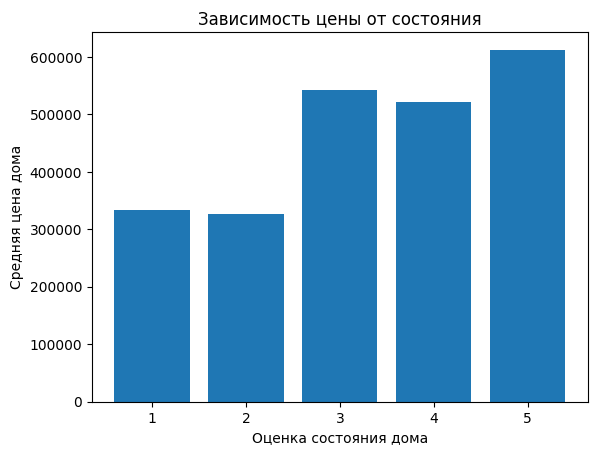

In [24]:
data = formDepData('condition', 'price', df)

plt.bar(
    data['condition'],
    data['price']
)

plt.title("Зависимость цены от состояния")
plt.xlabel("Оценка состояния дома")
plt.ylabel("Средняя цена дома");

Вывод: Не смотря на низкий коэффициент корреляции, на диаграмме прослеживается некоторое увеличение цены для домов в лучшем состоянии. Слабая выраженность зависимости связана с малой долей домов в плохом состоянии.

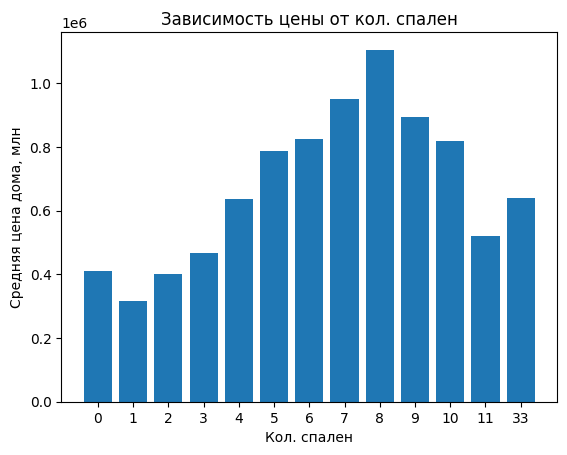

In [25]:
data = formDepData('bedrooms', 'price', df)

plt.bar(
    data['bedrooms'],
    data['price']
)

plt.title("Зависимость цены от кол. спален")
plt.xlabel("Кол. спален")
plt.ylabel("Средняя цена дома, млн");

Вывод: Дома без спален, ориентированы на какие-то специальые требования (возможно, студии), что делает их немного дороже, чем дома с 2-мя спальнями. Для домов с 1 по 8 спален прослеживается равномерный рост цены. Дома с большим количеством спален, ориентированы на несколько семей, имеют более простые условия, и уменьшаются в цене.

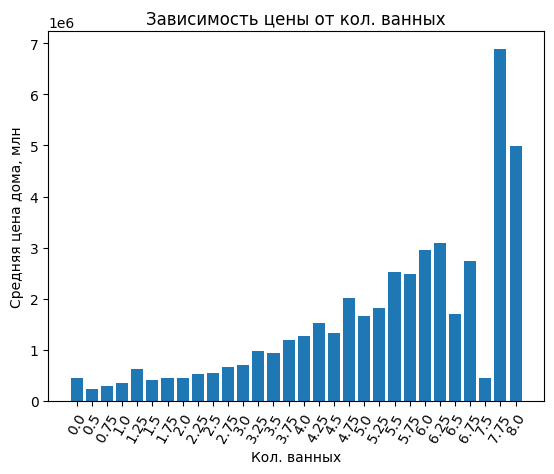

In [26]:
data = formDepData('bathrooms', 'price', df)

plt.bar(
    data['bathrooms'],
    data['price']
)

plt.xticks(rotation=60)
plt.title("Зависимость цены от кол. ванных")
plt.xlabel("Кол. ванных")
plt.ylabel("Средняя цена дома, млн");

Вывод: Наблюдается практически равномерный рост цен при увеличении числа ванных. Есть выбросы, соответствующие, домам типа townhouse.

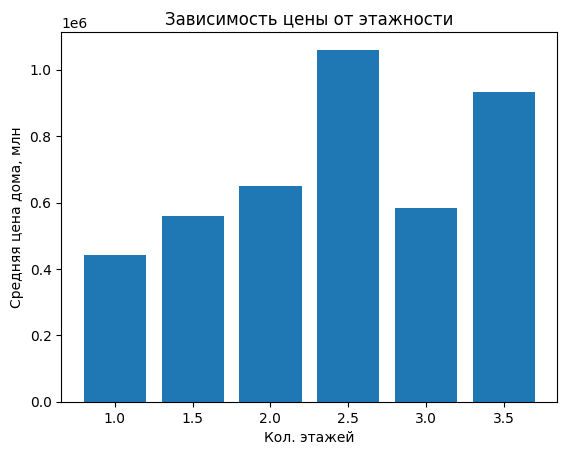

In [27]:
data = formDepData('floors', 'price', df)

plt.bar(
    data['floors'],
    data['price']
)

plt.title("Зависимость цены от этажности")
plt.xlabel("Кол. этажей")
plt.ylabel("Средняя цена дома, млн");


Вывод: Для домов с этажностью с 1 по 2.5 прослеживается равномерный рост цены. Дома с большей этажностью, ориентированы на несколько семей, имеют более простые условия, и меньшую цену, которая, также имеет тенденцию к увеличению при добавлении полуэтажа. Изменение закономерности для домов с этажностью 3.5 может быть связана с очень небольшой их долей.